In [4]:
import pandas as pd

In [5]:
import sqlite3

In [6]:
oredrs_df = pd.read_csv("orders.csv")
oredrs_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [7]:
users_df = pd.read_json("users.json")
users_df.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [8]:
import sqlite3


In [9]:
conn = sqlite3.connect("restaurants.db")
cursor = conn.cursor()


In [10]:
with open ("restaurants.sql", "r") as f:
   sql_script = f.read()

cursor.executescript(sql_script)
conn.commit()

OperationalError: table restaurants already exists

In [11]:
restaurants_df = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants_df.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [12]:
orders_users_df = pd.merge(
    oredrs_df,
    users_df,
    on="user_id",
    how="left"
)

orders_users_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular


In [13]:
final_df = pd.merge(
    orders_users_df,
    restaurants_df,
    on="restaurant_id",
    how="left"
)

In [14]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)

In [15]:
final_df.info()
final_df.isnull().sum()
final_df.head()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  str    
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  str    
 6   name               10000 non-null  str    
 7   city               10000 non-null  str    
 8   membership         10000 non-null  str    
 9   restaurant_name_y  10000 non-null  str    
 10  cuisine            10000 non-null  str    
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), str(7)
memory usage: 937.6 KB


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [16]:
final_df.drop_duplicates()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold,Restaurant_249,Italian,4.7
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular,Restaurant_267,Chinese,4.2
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold,Restaurant_420,Italian,4.0
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold,Restaurant_492,Italian,4.0


In [17]:
final_df['order_date'] = pd.to_datetime(
    final_df['order_date'],
    dayfirst=True
)


In [18]:
import matplotlib.pyplot as plt


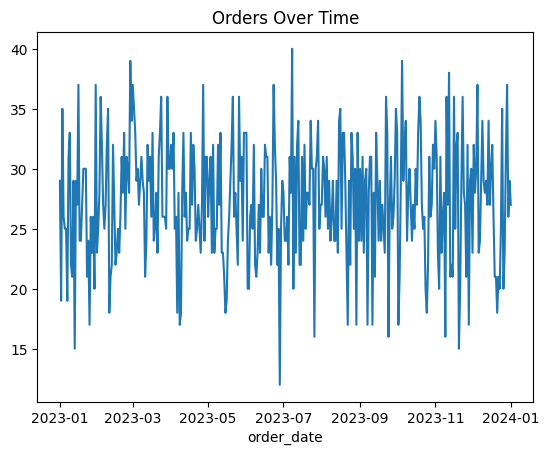

In [19]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'], dayfirst=True)

orders_by_date = final_df.groupby(final_df['order_date'].dt.date).size()

orders_by_date.plot(title="Orders Over Time")
plt.show()


In [20]:
final_df.groupby("user_id").size().describe()


count    2883.000000
mean        3.468609
std         1.792682
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
dtype: float64

In [22]:
final_df.groupby("city")['total_amount'].sum().sort_values(ascending=False)


city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64

In [23]:
final_df.groupby("city")['total_amount'].sum().sort_values(ascending=False)


city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64

In [25]:
final_df.groupby("cuisine")['total_amount'].sum().sort_values(ascending=False)


cuisine
Mexican    2085503.09
Italian    2024203.80
Indian     1971412.58
Chinese    1930504.65
Name: total_amount, dtype: float64

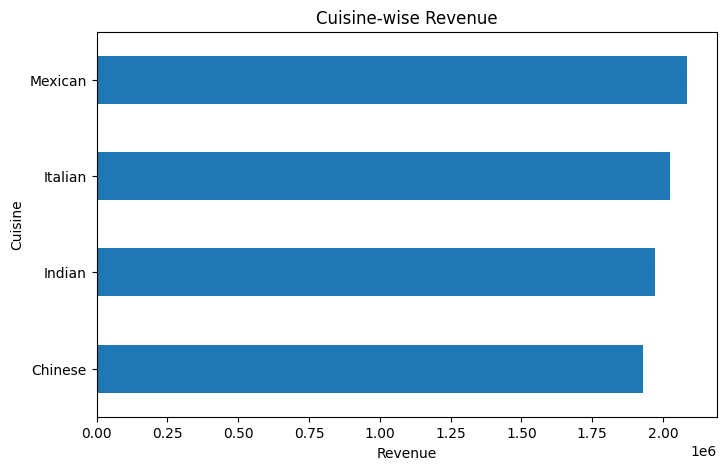

In [26]:
import matplotlib.pyplot as plt

cuisine_rev = final_df.groupby("cuisine")['total_amount'].sum().sort_values()

cuisine_rev.plot(kind='barh', figsize=(8,5))
plt.title("Cuisine-wise Revenue")
plt.xlabel("Revenue")
plt.ylabel("Cuisine")
plt.show()


In [28]:
final_df.groupby("membership")['total_amount'].mean()


membership
Gold       797.145556
Regular    805.158434
Name: total_amount, dtype: float64

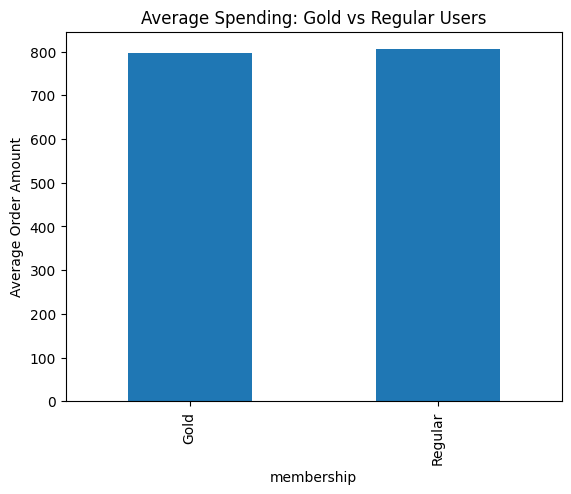

In [29]:
import matplotlib.pyplot as plt

membership_rev = final_df.groupby("membership")['total_amount'].mean()

membership_rev.plot(kind='bar')
plt.title("Average Spending: Gold vs Regular Users")
plt.ylabel("Average Order Amount")
plt.show()


In [31]:
final_df.groupby('month')['total_amount'].sum()



month
1     663020.26
2     630867.40
3     716738.98
4     666097.18
5     668428.61
6     610822.93
7     688559.45
8     694987.58
9     653838.07
10    699187.73
11    637772.43
12    681303.50
Name: total_amount, dtype: float64

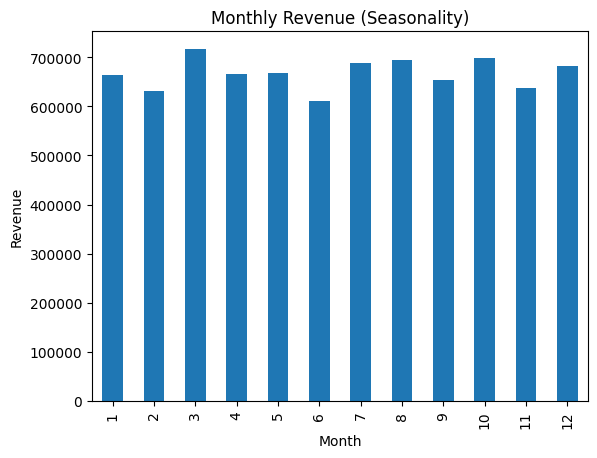

In [32]:
import matplotlib.pyplot as plt

# create month column
final_df['month'] = final_df['order_date'].dt.month

# group by month revenue
monthly_rev = final_df.groupby('month')['total_amount'].sum()

# plot
monthly_rev.plot(kind='bar')
plt.title("Monthly Revenue (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [34]:
gold_city_rev = (
    final_df[final_df['membership'] == 'Gold']   # Step 1 filter Gold
    .groupby('city')['total_amount']             # Step 2 group by city
    .sum()                                      # Step 3 sum revenue
    .sort_values(ascending=False)                # Step 4 highest first
)

gold_city_rev


city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

In [35]:
gold_city_rev.idxmax()


'Chennai'

In [36]:
user_spend = (
    final_df
    .groupby('user_id')['total_amount']  # total per user
    .sum()
)

high_spenders = user_spend[user_spend > 1000]

len(high_spenders)


2544

In [37]:
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ["3.0–3.5", "3.6–4.0", "4.1–4.5", "4.6–5.0"]

final_df['rating_range'] = pd.cut(
    final_df['rating'],
    bins=bins,
    labels=labels,
    include_lowest=True
)


In [38]:
rating_rev = (
    final_df
    .groupby('rating_range')['total_amount']
    .sum()
    .sort_values(ascending=False)
)

rating_rev


rating_range
4.6–5.0    2197030.75
3.0–3.5    2136772.70
4.1–4.5    1960326.26
3.6–4.0    1717494.41
Name: total_amount, dtype: float64

In [39]:
rating_rev.idxmax()


'4.6–5.0'

In [40]:
gold_avg_order = (
    final_df[final_df['membership'] == 'Gold']   # only Gold
    .groupby('city')['total_amount']             # group city-wise
    .mean()                                     # average order value
    .sort_values(ascending=False)
)

gold_avg_order


city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64

In [41]:
gold_avg_order.idxmax()


'Chennai'

In [42]:
restaurant_count = (
    final_df
    .groupby('cuisine')['restaurant_id']
    .nunique()
)


In [43]:
revenue = (
    final_df
    .groupby('cuisine')['total_amount']
    .sum()
)


In [44]:
summary = pd.DataFrame({
    'restaurant_count': restaurant_count,
    'revenue': revenue
})

summary.sort_values('restaurant_count')


,restaurant_count,revenue
cuisine,,
Chinese,120,1930504.65
Indian,126,1971412.58
Italian,126,2024203.80
Mexican,128,2085503.09


In [45]:
total_orders = len(final_df)


In [46]:
gold_orders = len(final_df[final_df['membership'] == 'Gold'])


In [47]:
percentage = (gold_orders / total_orders) * 100
round(percentage)


50

In [49]:
print(final_df.columns)


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating', 'month', 'rating_range'],
      dtype='str')


In [50]:
print(final_df.columns)


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating', 'month', 'rating_range'],
      dtype='str')


In [51]:
restaurant_stats = (
    final_df
    .groupby('restaurant_name_y')['total_amount']
    .agg(['count', 'mean'])
)

filtered = restaurant_stats[restaurant_stats['count'] < 20]

filtered.sort_values('mean', ascending=False)


,count,mean
restaurant_name_y,,
Restaurant_294,13,1040.222308
Restaurant_262,18,1029.473333
Restaurant_77,12,1029.180833
Restaurant_193,15,1026.306667
Restaurant_7,16,1002.140625
...,...,...
Restaurant_184,19,621.828947
Restaurant_498,18,596.815556
Restaurant_192,14,589.972857


In [52]:
filtered.sort_values('mean', ascending=False).index[0]


'Restaurant_294'

In [53]:
combo_rev = (
    final_df
    .groupby(['membership', 'cuisine'])['total_amount']
    .sum()
    .sort_values(ascending=False)
)

combo_rev


membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

In [54]:
combo_rev.idxmax()


('Regular', 'Mexican')

In [55]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'], dayfirst=True)


In [56]:
final_df['quarter'] = final_df['order_date'].dt.quarter


In [57]:
quarter_rev = (
    final_df
    .groupby('quarter')['total_amount']
    .sum()
    .sort_values(ascending=False)
)

quarter_rev



quarter
3    2037385.10
4    2018263.66
1    2010626.64
2    1945348.72
Name: total_amount, dtype: float64

In [58]:
gold_orders = final_df.query("membership == 'Gold'").shape[0]

gold_orders


4987

In [59]:
round(
    final_df.query("city == 'Hyderabad'")['total_amount'].sum()
)


1889367

In [60]:
final_df['user_id'].nunique()


2883

In [61]:
round(
    final_df.query("membership == 'Gold'")['total_amount'].mean(),
    2
)


np.float64(797.15)

In [62]:
final_df.query("rating >= 4.5").shape[0]


3374

In [64]:
top_city = (
    final_df.query("membership == 'Gold'")
    .groupby('city')['total_amount']
    .sum()
    .idxmax()
)

len(final_df.query("membership == 'Gold' and city == @top_city"))


1337

In [65]:
top_city = (
    final_df.query("membership == 'Gold'")
    .groupby('city')['total_amount']
    .sum()
    .idxmax()
)

len(final_df.query("membership == 'Gold' and city == @top_city"))


1337